In [1]:
# Bài tập 1
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    data = np.array(data)
    result = data[:, index]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

# question 1
X_data, y_data = prepare_data('advertising.csv')
list = [sum(X_data[0][:5]), sum(X_data[1][:5]), sum(X_data[2][:5]), sum(y_data[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


### Bài tập 2: Kỹ thuật huấn luyện data dùng one sample - linear regression

In [2]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b = 0
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1*x1 + w2*x2 + w3*x3 + b
    return result

# Question 2
y_data_pred = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
y_data_pred

1.0

In [3]:
# question 3
def compute_loss(y_hat, y):
    loss = (y_hat - y)**2
    return loss

l = compute_loss(y_hat=1, y=0.5)
l

0.25

In [4]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat - y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat - y)
    return dl_db

# Question 4
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

# question 5
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-1.0
-3.0


In [5]:
def update_weight_wi(wi, dl_wi, lr):
    wi = wi - lr*dl_wi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr*dl_db
    return b

# question 6
after_wi = update_weight_wi(wi=1.0, dl_wi=-0.5, lr=1e-5)
print(after_wi)

# question 7
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

1.000005
0.50001


In [6]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss 
            loss = compute_loss(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

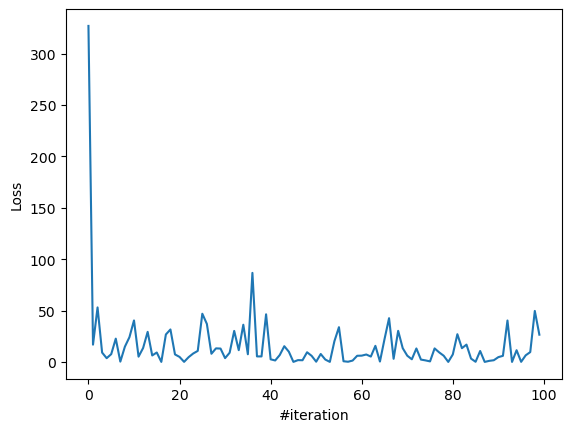

In [7]:
(w1, w2, w3, b, losses) = implement_linear_regression(X_data, y_data)
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()

In [8]:
# quesion 8
X_data, y_data = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X_data, y_data)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [9]:
# question 9:
tv = 19.2
radio = 35.9
newspaper = 51.3

X_data, y_data = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [10]:
# quesion 10
def compute_loss_mae(y_hat, y):
    loss = np.abs(y_hat - y)
    return loss

l = compute_loss_mae(y_hat=1, y=0.5)
l

0.5

In [11]:
def implement_linear_regression_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    N = len(y_data)

    w1, w2, w3, b = initialize_params()

    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # predict y
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss 
            loss = compute_loss_mae(y_hat, y)

            # compute gradient
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update weight
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_wi(b, dl_db, lr)

            losses.append(loss)
    return w1, w2, w3, b, losses

X_data, y_data = prepare_data('advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression_mae(X_data, y_data)

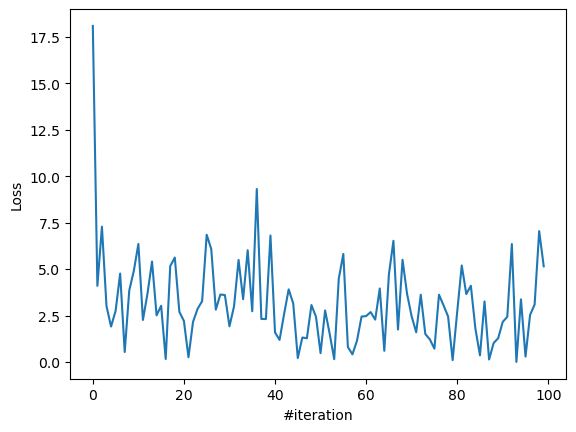

In [12]:
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()

### Bài 3: Kỹ thuật huấn luyện data dùng batch N samples - linear regression

In [13]:
def compute_loss_mse(y_hat, y):
    return (y_hat - y)**2

def compute_loss_mae(y_hat, y):
    return np.abs(y_hat - y)

In [14]:
initialize_params()

(0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)

In [15]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y_hat, y)
            # loss = compute_loss_mae(y_hat, y, N)

            # accumulate loss
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)


0.06710990754044266 0.15756173831487585 0.029619799386084403


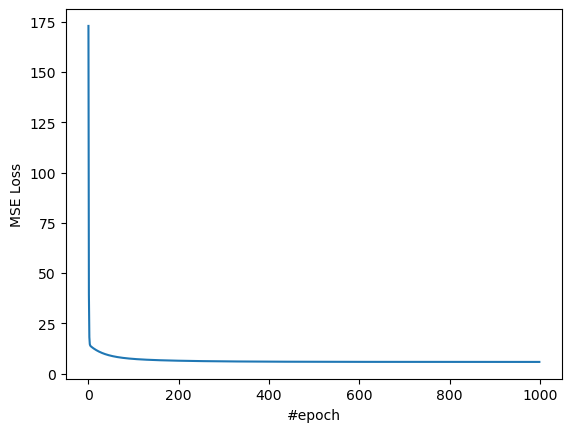

In [16]:
# quesion 11
X_data, y_data = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X_data, y_data,
                                                               epoch_max=1000,
                                                               lr=1e-5)
print(w1, w2, w3)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('MSE Loss')
plt.show()

#### N-sample training với loss function MAE
- Do MAE loss function có công thức $L(\hat{y}, y) = \frac{1}{N} \sum_{i=1}^{N}  \left| \hat{y} - y \right|$ nên khi tính gradient sẽ khác so với MSE loss function

In [17]:
def compute_gradient_wi_mae(xi, y_hat, y):
    return (xi*(y_hat - y)) / np.abs(y_hat - y)

def compute_gradient_b_mae(y_hat, y):
    return (y_hat - y) / np.abs(y_hat - y)

In [18]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    losses = []
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            loss = compute_loss_mae(y_hat, y)

            dl_dw1 = compute_gradient_wi_mae(x1, y_hat, y)
            dl_dw2 = compute_gradient_wi_mae(x2, y_hat, y)
            dl_dw3 = compute_gradient_wi_mae(x3, y_hat, y)
            dl_db = compute_gradient_b_mae(y_hat, y)

            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
            loss_total += loss

        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)
        losses.append(loss_total/N)
        
    return (w1, w2, w3, b, losses)


[12.537758993110772, 12.306786418928269, 12.075813844745774, 11.844841270563279, 11.613868696380775, 11.382896122198277, 11.151923548015775, 10.92095097383327, 10.689978399650776, 10.459005825468275, 10.228033251285774, 9.99706067710327, 9.76608810292077, 9.535115528738277, 9.304142954555772, 9.073170380373279, 8.842197806190775, 8.611225232008282, 8.380252657825782, 8.149280083643282, 7.9183075094607815, 7.687334935278275, 7.456362361095777, 7.2253897869132775, 6.99441721273078, 6.763444638548282, 6.532472064365782, 6.303696928779395, 6.081189938366895, 5.8586829479543985, 5.639518193954374, 5.433280404481873, 5.227042615009367, 5.02627351250224, 4.8386930358577445, 4.660172871694349, 4.487604353415483, 4.332324542879863, 4.195409847013496, 4.064693875461415, 3.956540575164051, 3.864482068331549, 3.778410233557584, 3.706484966712123, 3.6375251151200856, 3.575952255926808, 3.5242288100202717, 3.483688061341444, 3.4455647874889426, 3.4090701904365743, 3.3760863653040722, 3.3432516667412

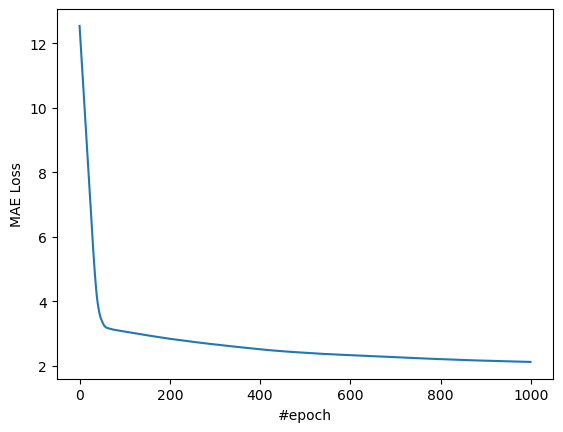

In [19]:
X_data, y_data = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X_data, y_data,
                                                               epoch_max=1000,
                                                               lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('MAE Loss')
plt.show()

### Bài tập 4:

In [20]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    # create list of features for input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0

    return [0,-0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

def predict(X_features, weights):
    X_features = np.array(X_features)
    weights = np.array(weights)

    result = np.dot(X_features, weights.T)
    return result

def compute_loss(y_hat, y):
    return (y_hat - y)**2

def compute_gradient_w(X_features, y, y_hat):
    X_features = np.array(X_features)
    dl_weights = 2*(y_hat - y)*X_features
    return dl_weights

# update weights
def update_weight(weights, dl_dweights, lr):
    weights = np.array(weights)
    weights = weights - lr*dl_dweights
    return weights

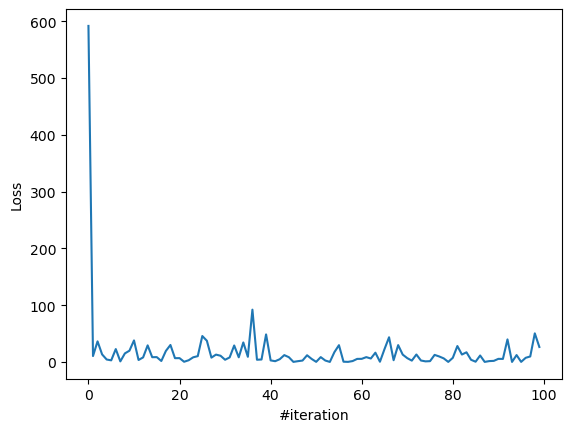

In [21]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample - row i
            features_i = X_feature[i]
            y = y_output[i]

            # compute output
            y_hat = predict(features_i, weights)

            # compute loss 
            loss = compute_loss(y_hat, y)

            # compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses.append(loss)
    return weights, losses

X_data, y_data = prepare_data('advertising.csv')
W, L = implement_linear_regression(X_data, y_data)
plt.plot(L[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()

In [22]:
X_data,y_data = prepare_data('advertising.csv')
W,L = implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5)
# Print loss value at iteration 9999
print(L[9999])

31.33922340810991
